In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pickle

In [23]:
N = 20

def cat_factory(n, alpha=1):
    cat_n = dq.coherent(N, alpha)
    for i in range(1,n):
        cat_n += dq.coherent(N, np.exp(1j*2*i*np.pi/n)*alpha)
    
    return cat_n / cat_n.norm()

def cat_dm_factory(n, alpha=1):
    return cat_factory(n, alpha=alpha).todm()

def plot_wigner(xvals, yvals, wigner_values):
    plt.contourf(xvals, yvals, wigner_values.T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

def plot_wigner_fct(wigner_fct):
    plt.contourf(wigner_fct[0], wigner_fct[1], wigner_fct[2].T, levels=100, cmap="seismic", vmin=-2/np.pi, vmax=2/np.pi)
    plt.colorbar()

def load_wigner(file):
    with open(file, 'rb') as f:
        wigner_fct = pickle.load(f)
    return wigner_fct


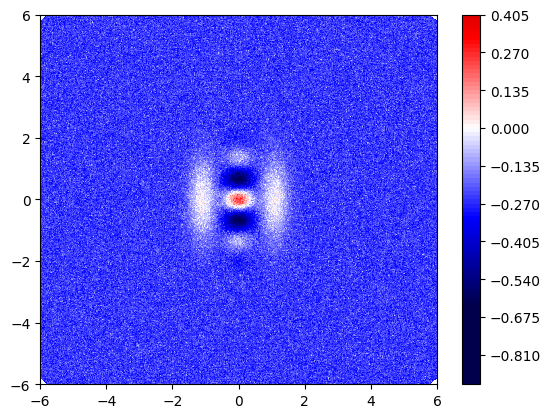

In [28]:
wigner_fct = load_wigner("../../data/synthetic/noisy_wigner_7.pickle")
plot_wigner_fct(wigner_fct)

In [20]:
# plt.plot(wigner_fct[0])
wigner_fct[2]

array([[1.34065962, 1.19524407, 1.04552221, ..., 0.89446884, 0.90102768,
        0.94093418],
       [1.11067188, 0.62781376, 1.2083751 , ..., 1.10823476, 1.04228973,
        1.20926082],
       [0.69453067, 1.30872774, 1.13744724, ..., 1.14375162, 1.02743316,
        0.91495264],
       ...,
       [1.14507329, 1.30244684, 0.91006637, ..., 1.01198626, 1.0652144 ,
        0.9040795 ],
       [1.02719426, 0.88065028, 1.29989922, ..., 1.21662903, 1.2093842 ,
        1.19951618],
       [0.85772783, 1.14151478, 0.90915477, ..., 1.08739722, 1.39894629,
        1.01576746]])

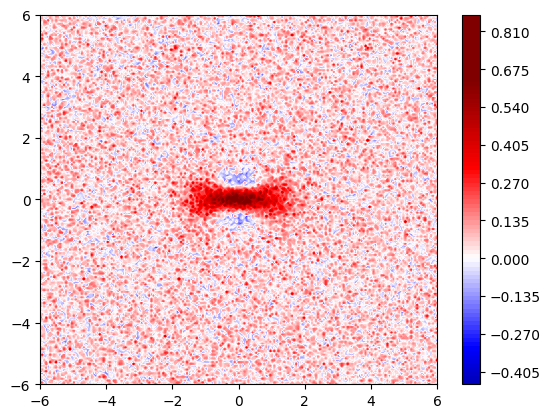

In [ ]:
state = cat_factory(2)
xvec, yvec, wigner = dq.wigner(state)

a = 1
b = 0.01
sigma = 0.1
noise = np.random.normal(0.0, scale=sigma, size=wigner.shape)

wigner_noisy = a*wigner + b*np.ones_like(wigner) + noise

plot_wigner(xvec, yvec, wigner_noisy)






In [31]:
N=20
xvals, yvals, wigner = dq.wigner(dq.fock(N, 0))

np.sum(wigner) / wigner.shape[0] / wigner.shape[1]

Array(0.00687551, dtype=float32)

In [30]:
12*12

144